matplotlib is a desktop plotting package designed for creating publication quality plots. 

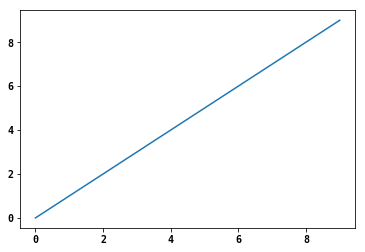

In [383]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(np.arange(10))
plt.show()

plots in matplotlib resides within a `figure` object. Create a new figure within `plt.figure`

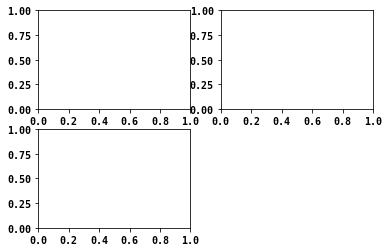

In [384]:
fig = plt.figure() # new figure object
ax1 = fig.add_subplot(2,2,1) # figure should be 2x2, selecting 1st of 4 subplots...add_subplot(height, width, plot number).
ax2= fig.add_subplot(2,2,2) # 2x2 figure, selecting 2nd subplot
ax3=fig.add_subplot(2,2,3)

The objects returned by fig.add_subplot above are AxesSubplot objects, on which you can directly plot on the other empty subplots by calling each one's instance methods. 

When we issue a plotting command, matplotlib draws on the last figure and subplot used.b

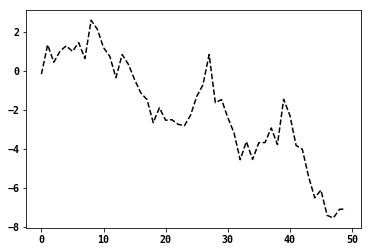

In [385]:
from numpy.random import randn

plt.plot(randn(50).cumsum(), 'k--') #'k---' is a style option instucting matplotlib to plot a black dashed line


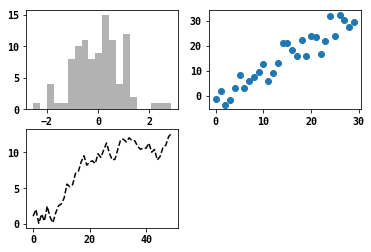

In [386]:
_= ax1.hist(randn(100), bins=20, color='k', alpha = 0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3 * randn(30))
ax3.plot(randn(50).cumsum(), 'k--')

fig  # Call up fig object

#fig, axes = plt.subplots(2,3) # creates a figure with multiple subplots according to a layout
#axes # an array that can be indexed like a 2d array i.e. axes[0,1]

We can also indicate that subplots should have the same X or Y axis using `sharex` and `sharey`. Otherwise matplotlib auto-scales plot limits independently. 

#### Adjusting the spacing around subplots 

By default, matplotlib leaves a certain amount of padding around the outside of hte subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot. 

The spacing can also be easily changed using `subplots_adjust` figure method:

`subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)`

`wspace` controls the % of the figure width to use as spacing between the subplots

Example of shrinking spacing all the way to zero:

In [387]:
for i in range(2):
    for j in range(2):
        print i, j
# a nested for loop to create an iterable 2D array

0 0
0 1
1 0
1 1


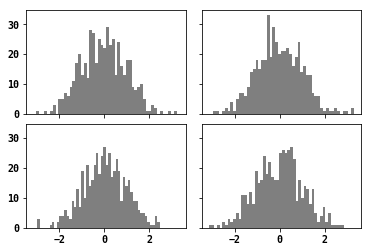

In [388]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)  #create figure and axes objects

for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k',alpha=0.5)

plt.subplots_adjust(wspace=.1, hspace=.1)

### Colors, Markers, and Line Styles


Matplotlib's main plot function accepts x and y coordinates and optionally a string abbreviation indicating color and line style. For exapmle, to plot x vs. y with green dashes, execute below.

linestyles:
https://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle

colors:
https://matplotlib.org/api/colors_api.html

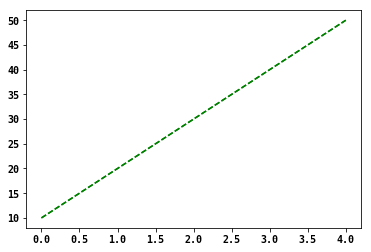

In [389]:
x = [0,1,2,3,4]
y= [10,20,30,40,50]


plt.plot(x,y,'g--')

# equivalent to:
plt.plot(x,y,linestyle='--',color='green')

markers: 

https://matplotlib.org/api/markers_api.html

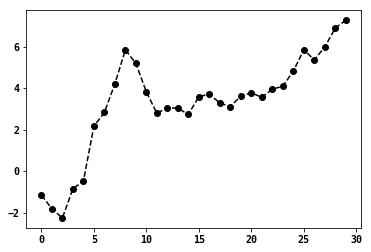

In [390]:
plt.plot(randn(30).cumsum(),color='k',linestyle='dashed',marker='o')

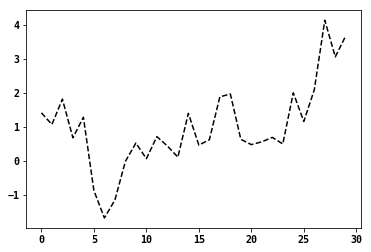

In [391]:
# Override linear interpolatino through drawstyle option = steps-post

data=randn(30).cumsum()

print plt.plot(data,'k--',label='Default')



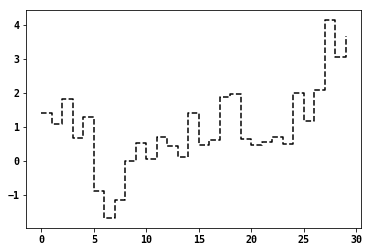

In [392]:
print plt.plot(data,'k--', drawstyle='steps-post',label='steps-post')

#### Setting the title, axis labels, ticks, and ticklabels 

To change the X axis ticks, use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range. The latter specifies what the labels hsould be. By default, the locations are also the labels.

#### Adding legends

Legends are another critical element for identifying plot elements. The easiest way to add a legend is to pass the `label` argument when adding each piece of the plot using `plot()` method:

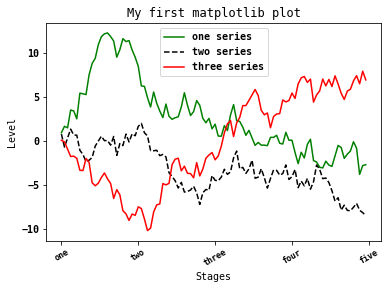

In [393]:
fig=plt.figure() # Create a figure object
ax =fig.add_subplot(1,1,1) # Add a subplot

ticks = ax.set_xticks([0,25,50,75,100]) # Customize the x-axis ticks for subplot
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation =30, fontsize='small')

# set_xlabel gives a name to the x-axis while set_title the subplot title
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Level')

# Add data to the subplot using plot method
#ax.plot(randn(100).cumsum())

ax.plot(randn(100).cumsum(),'g',label='one series')
ax.plot(randn(100).cumsum(),'k--',label='two series')  # k= black 
ax.plot(randn(100).cumsum(),'r', label='three series')

# call ax.legend or plt.legend to automatically create a legend
ax.legend(loc='best')

To exclude 1+ elements from the legend ,pass `label='__nolegend__'

### Annotations and Drawing on a Subplot

We may wish to draw our own plot annotations which can consist of text, arrows, and other shapes. Annotations and text can be added using the `text, arrow` and `annotate` functions. 

`text` draws text at given coordinates (x,y) with optional custom styling:

In [394]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = [0,1,2,3,4]
y= [10,20,30,40,50]
ax.plot(x,y)
ax.text(x,y,'Hello!', family='monospace', fontsize=8)

TypeError: float() argument must be a string or a number

Example: Plot the closing S&P 500 index price since 2007 and annotatite it with some of the important dates from 2008-2009 financial crises

C:\Users\sonya\Documents\Python for Data Analysis\data\ch08


,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


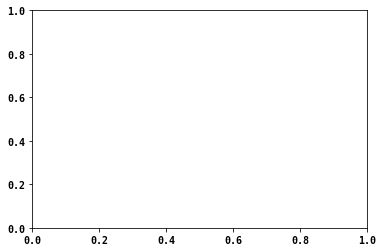

In [395]:
from datetime import datetime

fig = plt.figure()
ax=fig.add_subplot(1,1,1)

%cd C:\Users\sonya\Documents\Python for Data Analysis\data\ch08
    
data=pd.read_csv('spx.csv',index_col=0, parse_dates=True)
data.head()

A `datetime` object is a single object containing all the information from a date object and a time object. Like a date object, datetime assumes the current Gregorian calendar extended in both directions; like a time object, datetime assumes there are exactly 3600*24 seconds in every day.

A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument `xy` and the location of the text `xytext`. Both of these arguments are (x,y) tuples.

https://matplotlib.org/users/annotations.html

`series.asof()`: The last row without any NaN is taken (or the last row without NaN considering only the subset of columns in the case of a DataFrame)

C:\Users\sonya\Documents\Python for Data Analysis\data\ch08


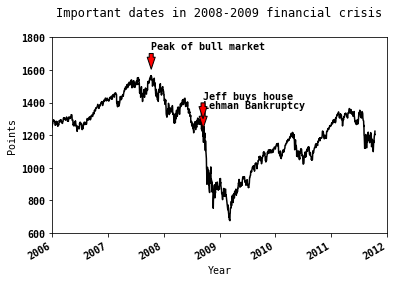

In [396]:
# Plot directly from a pandas dataframe
from datetime import datetime

fig = plt.figure()
ax=fig.add_subplot(1,1,1)

%cd C:\Users\sonya\Documents\Python for Data Analysis\data\ch08
    
data=pd.read_csv('spx.csv',index_col=0, parse_dates=True)
data.head()
spx=data['SPX']
spx.plot(ax=ax,style='k-')

crises_data=[
    (datetime(2007,10,11), 'Peak of bull market'),   
    #(datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy'),
    (datetime(2008,9,14), 'Jeff buys house')
]  # list of datetime objects and labels within the tuple

for date, label in crises_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 220),
                arrowprops=dict(facecolor='red', headwidth=8),
                horizontalalignment='left',verticalalignment='top')
    
# Zoom in on 2006-2010
ax.set_xlim(['1/1/2006', '1/1/2012'])
ax.set_ylim([600,1800])

# Label the axes and titles of plot
ax.set_title('Important dates in 2008-2009 financial crisis\n')
ax.set_xlabel('Year')
ax.set_ylabel('Points')

Matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like Rectange and Circle are found in matplotlib.pyplot but the full set is located in matplotlib.patches.

To add a shape to a plot, create patch object `shp` and add it to a subplot by calling `ax.add_patch(shp)`

Rectangle: `class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs`
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.Rectangle.html

Circle: `class matplotlib.patches.Circle(xy, radius=5, **kwargs)`
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.Circle.html#matplotlib.patches.Circle

Polygon: `class matplotlib.patches.Polygon(xy, closed=True, **kwargs)` xy is a numpy array with shape Nx2.
https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.Polygon.html#matplotlib.patches.Polygon

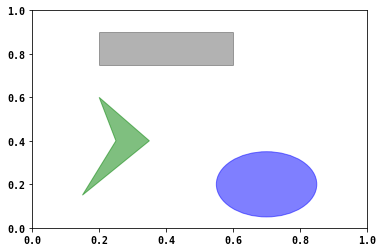

In [397]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='k', alpha=0.3)
circ = plt.Circle((0.7,0.2), 0.15, color='b',alpha=0.5)  #alpha = the plot fill capacity (from 0 to 1)
pgon=plt.Polygon([[0.15,0.15], [0.35,0.4], [0.2,0.6],[0.25,0.4]], color='green', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

Active figures can be saved to file using `plt.savefig`. This method is = to the figure object's `savefig` instance method. For example, to save an SVG version of a figure, type:

In [398]:
plt.savefig('figex1.svg', fname='C:\Users\sonya\Documents\Python for Data Analysis\data\ch08') #filepath
plt.savefig('figex2.png', dpi=400, bbox_inches='tight') # 400 dots per inch resolution and minimal whitespace around the plot

### matplotlib Configuration

Nearly all of the default behavior can be customized via an extensive set of global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and etc. We can programmatically configure parameters using `plt.rc` method.

`plt.rc`: the first arg is the component you wish to customize (i.e. figure, axes, xtick, ytick, grid, legend, etc.) An easy way to write down the options in your program is as a dict

For more extensive customization and to see a list of all options, matplotlib comes with a configuration file `matplotlibrc` in the `matplotlib/mpl-data` directory. If we customize this file and place it in our home directory titled `.matplotlibrc`, it will be loaded each time we use matplotlib.

In [399]:
# Ex: Set global default figure size to be 8x8
plt.rc('figure',figsize=(5.5,5.5))

# Ex: Set font options using a dict
font_options = {'family': 'monospace',
                'weight' : 'bold',
                'size': '10'}

plt.rc('font', **font_options)

### Plotting Functions in pandas

pandas has an increasing number of high-level plotting methods for creating standard visualizations that take advantage of how data is organized in df objects.

#### Line Plots

Series and df each have a plot method for making many different plot types. By default, they make line plots.

The Series object's index is passed to matplotlib for plotting on the X axis, but this can be disabled by passing use_index=False. 

The X-axis ticks and limits can be adjusted using the `xticks` and `xlim` options.
The Y-axis with `yticks` and `ylim`.

df's `plot` method plots each of its columns as a different line on the same subplot, creating a legend automatically. 

Most of pandas's plotting methods accept an optional `ax` parameter, which can be a subplot object. 

plot() options: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html



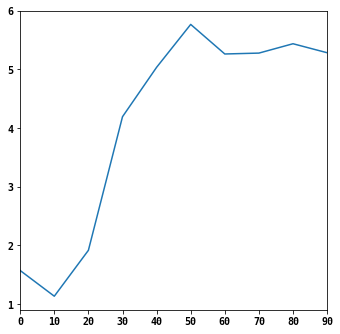

In [400]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))  # index is plotted as the x-axis by default
s.plot()

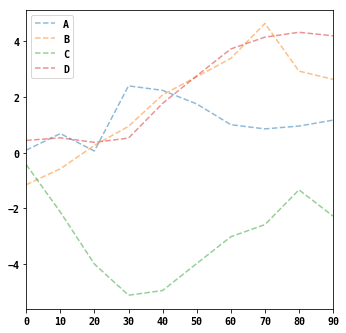

In [401]:
from pandas import DataFrame, Series

df = DataFrame(np.random.randn(10,4).cumsum(0),
               columns =['A','B','C','D'],
               index=np.arange(0,100,10))

df.plot(style ='--', alpha = 0.5, label = ['Series A','Series B','Series C','Series D'])  
# alpha controls fill opacity, style = linestyle

#### Bar Plots

Making bar plots instead of line plots is as simple as passing `kind='bar'` (for vertical bars) or `kind='barh'`

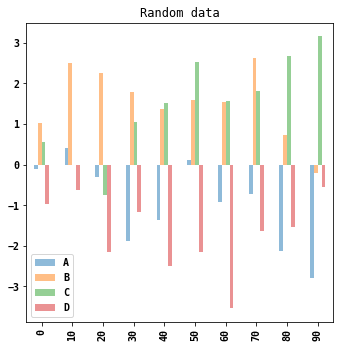

In [402]:
# Example 1
df = DataFrame(np.random.randn(10,4).cumsum(0),
               columns =['A','B','C','D'],
               index=np.arange(0,100,10))

df.plot(style ='--', alpha = 0.5, kind='bar', title = 'Random data')  #kind = type of graph

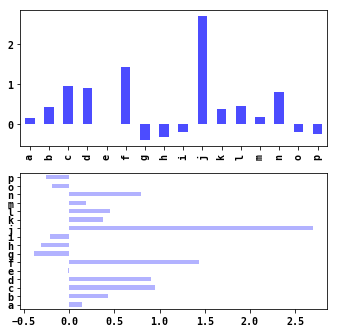

In [403]:
# Example 2

fig, axes = plt.subplots(2,1) # 2 rows, 1 column

data = Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar',ax = axes[0], color='b',alpha=0.7)  # plotting along 1st subplot using axes
data.plot(kind='barh', ax=axes[1], color='b', alpha=0.3) # horizontal bar chart along 2nd subplot

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side for each value. 

**`numpy.random.randn(d0, d1, ..., dn)`**: Return a sample (or samples) from the “standard normal” distribution.

**`pd.Index()`** : Immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all pandas objects

In [404]:
df = DataFrame(np.random.randn(6,4),
              index=['one','two','three','four','five','six'],
              columns=pd.Index(['A','B','C','D'], name ='Genus'))

df

Genus,A,B,C,D
one,0.733170,1.280214,0.345023,-0.695124
two,-0.062287,-0.028240,0.681860,-1.058152
three,0.392399,-0.029405,-0.115204,0.847918
four,-2.405027,-1.268858,-1.171505,1.418641
five,-0.570766,0.596776,0.045891,-0.101849
six,1.102156,-0.261123,-0.413869,-0.083177


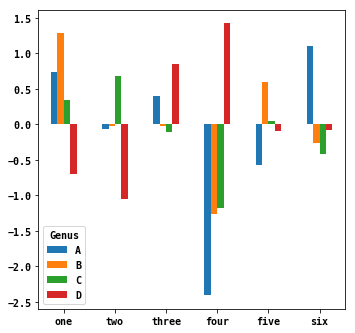

In [405]:
df.plot(kind='bar', rot=0) # rotation = 0

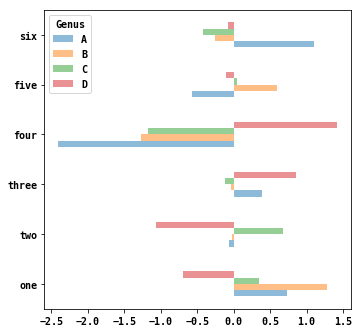

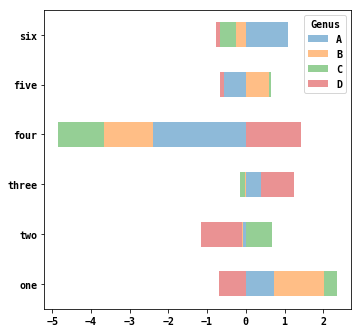

In [406]:
df.plot(kind='barh', stacked= False, alpha=0.5)
df.plot(kind='barh', stacked= True, alpha=0.5)

A useful recipe for barplots is to visualize a Series's value frequency using value_counts: **`s.value_counts().plot(kind='bar')`**

**`Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)`**

Returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

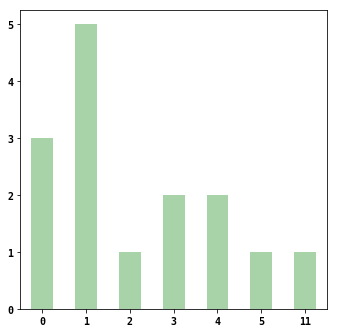

In [407]:
s = Series([0,0,0,1,1,1,11,1,1,2,5,4,3,3,4])
s= s.sort_values(axis=0)

s.value_counts(sort=False).plot(kind='bar', color='g', alpha=0.34, rot=0)

Example: A stacked bar chart showing the percentage of data points for each party size on each day. We'd load the data using read_csv and make a cross-tab by day and party size:

In [408]:
tips =pd.read_csv('tips.csv')
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [409]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [410]:
# Not many 1- and 6-person parties, show party sizes 3-5
party_counts=party_counts.iloc[:,2:5]
print party_counts

# Normalize so that each row sums to 1 (cast to float to avoid integer division issues on Python 2.7) and make the plot
party_pcts = party_counts.div(party_counts.sum(1).astype(float),axis=0) # summing along axis 1 from left to right
print party_pcts

size   3   4  5
day            
Fri    1   1  0
Sat   18  13  1
Sun   15  18  3
Thur   4   5  1
size         3        4         5
day                              
Fri   0.500000  0.50000  0.000000
Sat   0.562500  0.40625  0.031250
Sun   0.416667  0.50000  0.083333
Thur  0.400000  0.50000  0.100000


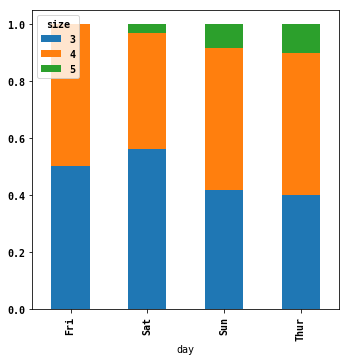

In [411]:
#! figure, id=vis_tips_barplot, width=5in, title="Fraction of parties by size on each day"
party_pcts.plot(kind='bar',stacked=True)

Party sizes appear to increase on the weekend in this data set

### Histograms and Density Plots 

**Histogram** gives a discretized display of value frequency by splitting data points into discrete, evenly spaced bins, and the # of data points in each bin is plotted. 

For example, we can make a histogram of tip percentages of the total bill using the `hist` method on the series below.

`DataFrame.hist(data, column=None, by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=None, layout=None, bins=10, **kwds)` 

.hist: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html

Axes(0.125,0.125;0.775x0.755)


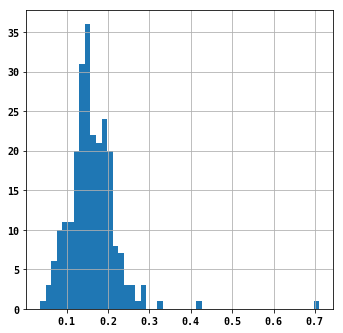

In [412]:
# create a tip_pct column in tips df
tips['tip_pct']=tips['tip'] / tips['total_bill'] 

print tips['tip_pct'].hist(bins=50)

Axes(0.125,0.125;0.775x0.755)


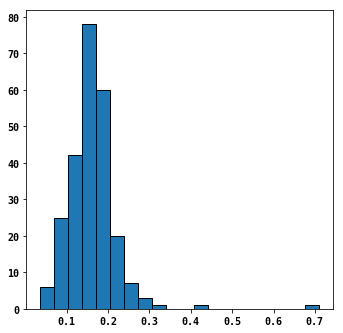

In [413]:
print tips['tip_pct'].hist(bins=20, grid=False, edgecolor='black', linewidth=1) 
# add outlines of shapes that are black with width 1, no gridlines

A related plot type is a **density plot** which is formed by computing an estimate of a continuous probability distribution that might've generated the observed data. A usual procedure is to approximate this distribution as a mixture of `kernels`, that is, simpler distributions like the normal (Gaussian) distribution. Thus, density plots are also known as KDE (kernel density estimate) plots. 

Using `plot` with `kind='kde'` makes a density plot using the standard mxiture of normals KDE.

These 2 plots are usually plotted together with a KDE on top and histogram in normalized form (to give a binned density). 

Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


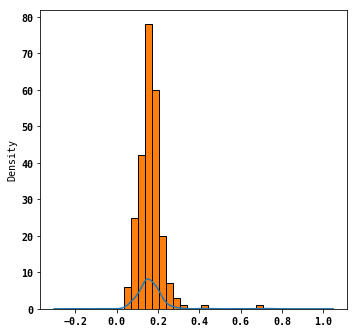

In [414]:
print tips['tip_pct'].plot(kind='kde')
print tips['tip_pct'].hist(bins=20, grid=False, edgecolor='black', linewidth=1) 

Example: Considera bimodal distribution consisting of draws from 2 different standard normal distributions

0      -1.108395
1       0.793101
2       0.089924
3       0.310734
4       1.753140
5      -0.060450
6      -0.624326
7       0.862204
8       0.386436
9      -0.527272
10      0.533325
11     -0.435117
12     -0.570027
13     -0.010970
14      1.061460
15      0.075458
16      0.476790
17      0.883237
18     -0.224317
19     -0.982251
20      0.449446
21     -1.092964
22     -1.654436
23      1.194240
24      0.452086
25      0.372856
26     -2.115304
27      0.691832
28      1.217520
29     -2.193165
         ...    
370     8.951766
371    11.974466
372     9.118278
373    10.166943
374     9.224339
375     8.779005
376     9.620224
377    10.514497
378     9.678223
379    11.107192
380     7.187328
381    15.468939
382     8.651042
383    12.925646
384     9.904207
385     9.700472
386    10.290563
387     8.543421
388    14.856741
389    11.709105
390    14.151867
391    10.386914
392     7.954821
393     7.746894
394    10.683396
395    13.266098
396    12.719269
397     7.3358

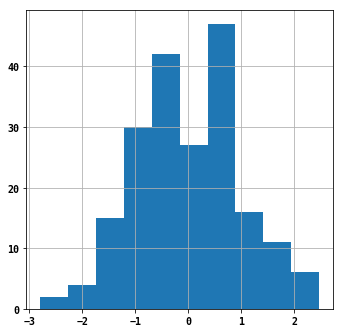

In [415]:
comp1 = np.random.normal(0,1,size=200) #N(0,1)
comp1=Series(comp1)
comp1.hist()

comp2=np.random.normal(10,2,size=200) #N(10,4)  Mean of 10 and standard dev of 4

values = Series(np.concatenate([comp1, comp2]))

values

**`density`** : bool, optional
If False, the result will contain the number of samples in each bin. 
If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. 

Note that the sum of the histogram values will not be equal to 1 unless bins of unity width are chosen; it is not a probability mass function.
Overrides the normed keyword if given.

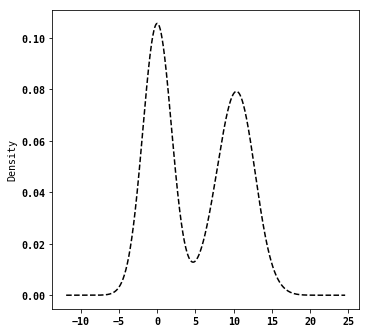

In [416]:
values.plot(kind='kde',style='k--')

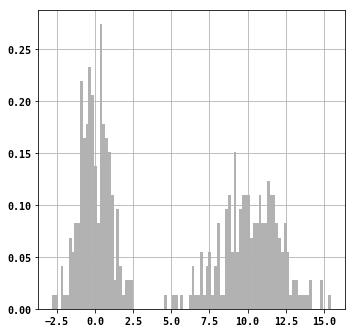

In [417]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)

#### Scatter Plots

A useful way of examining the relationship between 2 1D data series. matplotlib has a `scatter` plotting method that's the workhorse. 

Example: macrodata dataset from the statsmodels project, select a few vars, then compute log differences:

In [418]:
macro=pd.read_csv('macrodata.csv')

data=macro[['cpi','m1','tbilrate','unemp']]

trans_data=np.log(data).diff().dropna()  # compute log differences of data and remove na's
trans_data[-5:] # last 5 rows

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


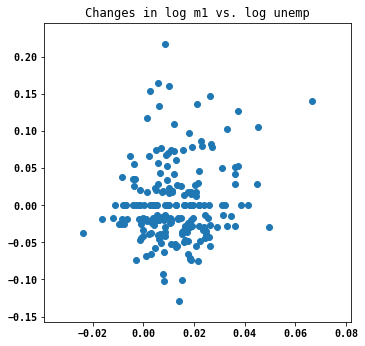

In [419]:
# Easiest to plot using plt.scatter

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1','unemp'))

To make a **scatter plot matrix**, use pandas `plotting.scatter_matrix` function for creating one from a DataFrame. It also supports histograms and density plots of each variable along the diagonal. It's helpful to look at all the scatter plots among a group of variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003CF27438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003DD89278>]], dtype=object)

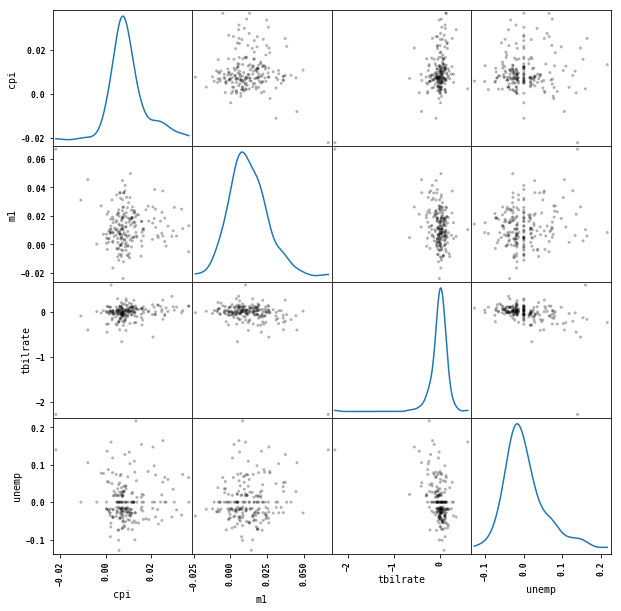

In [420]:
from pandas.plotting import scatter_matrix

scatter_matrix(trans_data, diagonal='kde',alpha=0.3, color = 'k',figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003E150CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003F22A7F0>]], dtype=object)

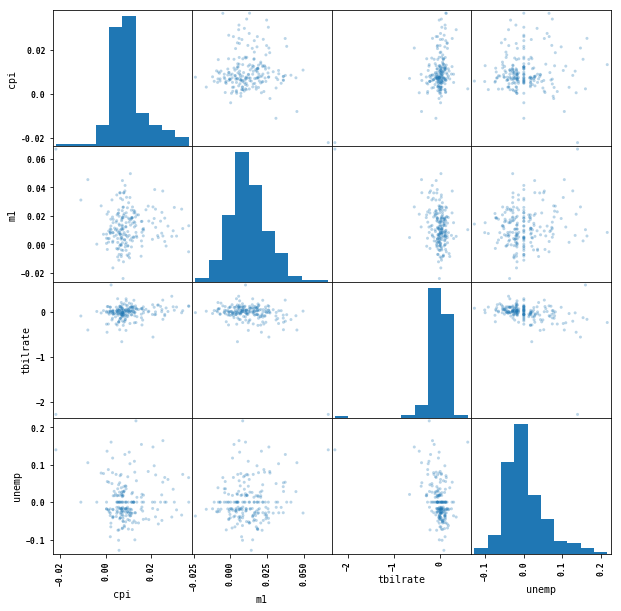

In [421]:
scatter_matrix(trans_data, diagonal='hist',alpha=0.3, figsize=(10, 10))

### Example: Visualizing Haiti Earthquake Crisis Data

infromation related to natural disasters and geopolitical events via text message. Data was collected during hte 2010 Haiti earthquake crisis and aftermath.

Each row represents a report sent from someone's mobile phone indicating an emergency or some other problem. Each row has an associated timestamp and location (longitude, latitude).

In [422]:
# load dat

data = pd.read_csv('Haiti.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [423]:
data[['INCIDENT DATE','LATITUDE','LONGITUDE']].head()

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671


The CATEGORY field contains a comma-separated list of codes indicating hte type of message. Some of the categories are missing, so we might want to drop these data points. 

In [424]:
data[['CATEGORY']].head(10)

,CATEGORY
0,"1. Urgences | Emergency, 3. Public Health,"
1,"1. Urgences | Emergency, 2. Urgences logistiqu..."
2,"2. Urgences logistiques | Vital Lines, 8. Autr..."
3,"1. Urgences | Emergency,"
4,"1. Urgences | Emergency,"
5,"5e. Communication lines down,"
6,"4. Menaces | Security Threats, 4e. Assainissem..."
7,"4. Menaces | Security Threats,"
8,"2. Urgences logistiques | Vital Lines, 2f. San..."
9,"2. Urgences logistiques | Vital Lines, 2d. Ref..."


Calling `describe` shows that there are some aberrant locations

In [425]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


Cleaning bad locations and removing missing categories is fairly simple

In [426]:
clean_data= data[(data.LATITUDE > 18) & 
                 (data.LATITUDE < 20) &
                 (data.LONGITUDE > -75) & 
                 (data.LONGITUDE < -70) &
                 (data.CATEGORY.notnull())]

clean_data.describe()

,Serial,LATITUDE,LONGITUDE
count,3569.000000,3569.000000,3569.000000
mean,2081.498459,18.592503,-72.424994
std,1170.311824,0.273695,0.291018
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524200,-72.417498
50%,2166.000000,18.539269,-72.335000
75%,3089.000000,18.561800,-72.293939
max,4052.000000,19.940630,-71.099489


To do analysis/visualization of this data by category, we need to do some data wrangling to get the data into a more agreeable form. Two functions are created to get a list of all the categories and to split each category into a code and an English name:

In [427]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(',')) # split data based on comma
    return [x for x in stripped if x] # return each element in stripped

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.') # Split row by . into 2 elements
    if '|' in names:
        names = names.split('|')[1]  # For names, split by | and only return the 2nd element of that split
    return code, names.strip()

# Test the get_english function

get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

Now make a `dict` mapping code to name because we'll use the codes for analysis.

In [428]:
data = pd.read_csv('Haiti.csv')

data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
        (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
        & data.CATEGORY.notnull()]

def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series) 
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.') 
    if '|' in names:
        names = names.split(' | ')[1] # retrieve only the english part of the codes, not the French
    return code, names.strip()

all_cats = get_all_categories(data.CATEGORY)
print all_cats



['1. Urgences | Emergency', '1a. Highly vulnerable', '1b. Urgence medicale | Medical Emergency', '1c. Personnes prises au piege | People trapped', '1d. Incendie | Fire', '2. Urgences logistiques | Vital Lines', "2a. Penurie d'aliments | Food Shortage", "2b. Penurie d'eau | Water shortage", '2c. Eau contaminee | Contaminated water', '2c. Probleme de securite | Security Concern', '2d. Refuge | Shelter needed', '2e. Penurie de carburant | Fuel shortage', '2f. Sans courant | Power Outage', '3. Public Health', '3a. Infectious human disease', '3b. Chronic care needs', '3c. Besoins en materiels et medicaments | Medical equipment and supply needs', "3d. OBGYN/Women's Health", '3e. Psychiatric need', '4. Menaces | Security Threats', '4a. Pillage | Looting', '4c. Group violence', '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion', '5. Infrastructure Damage', '5a. Structure effondres | Collapsed structure', '5b. Structures a risque | Unstable Structure', '5c. Route barre

In [429]:
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats) 
# For all categories, split the codes and the english parts. Create a dictionary with the codes and english parts
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [430]:
english_mapping['2a']

'Food Shortage'

There's many ways to augment the data set to be able to easily select records by category. One way is to add indicator dummy columns, one for each category. To do that, first extract the unique category codes and construct a DataFrame of zeros having those as its columns and the same index as data:

In [431]:
def get_code(seq):  # get the code part of the category
    return [x.split('.')[0] for x in seq if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series) 
    return sorted(set.union(*cat_sets))  # get a list of unique categories

all_cats = get_all_categories(data.CATEGORY)

all_codes=get_code(all_cats)
code_index=pd.Index(np.unique(all_codes)) # index of unique codes
dummy_frame=DataFrame(np.zeros((len(data), len(code_index))),
                      index=data.index, columns=code_index)  # create columns of zeros for all the categories

dummy_frame.iloc[:, :5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


The trick is then to set the appropriate entries of each row to 1, lastly joining this with data

`zip(*iterables)`
Make an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. 

In [432]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.loc[row,codes] = 1  # fill in 1's for any occurences of the categories
    
data = data.join(dummy_frame.add_prefix('category_'))

data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After data cleansing and wrangling, it's time to analyze and make some plots. Since this is spatial data, we'd like to pot the data by category on a map of Haiti. The `basemap` toolkit, an add-on to matplotlib, enables plotting 2D data on maps using lat, longs:

In [9]:
from mpl_toolkits.basemap import Basemap

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
# create polar stereographic Basemap instance. 
    m = Basemap(ax=ax, projection='stere', 
                lon_0=(urlon + lllon) / 2, 
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat, 
                llcrnrlon=lllon, urcrnrlon=urlon, 
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map. 
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

The idea is that the reutned Basemap object knows how to transform coordinates onto the canvas. We write the following code to plot the data observations for a # of different categories. Per category, filter down the data set to the coordinates labeled by that category, plot a Basemap on the appropriate subplot, transform the coordinates, then plot the points using the Basemap's plot method:

In [ ]:
import matplotlib.pyplot as plt

fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10)) # create figure  and axes object
fig.subplots_adjust(hspace=0.05,wspace=0.05) # adjust spacing

to_plot = ['2a','1','3c','7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m=basic_haiti_map(ax,lllat=lllat, urlat=urlat,
                      lllon=lllon, urlon=urlon)
    
cat_data = data[data['category_%s' % code] ==1]

# compute map proj coordinates
x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

m.plot(x,y,'k',alpha=0.5)
ax.set_title('%s: %s' % (code, english_mapping[code]))